this notebook does some spot checking on learned weight patterns in `scripts/training/yuanyuan_8k_a_3day/feature_approximation/k_bl_recurrent_k3/submit_sep2.py`.

It's interesting that PCA done here mimic those results in `results_processed/imagenet_val/feature_approximation/local_pcn_original_imagenet/pca_analysis.ipynb`.

Not sure if this is bad or good. But this seems to suggest some commonalities among recurrent models.

check `results_processed/yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/pca_analysis_20200218_layer3_kernelsize3or5.ipynb` as well. Maybe I should try another approximation function.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from thesis_v2 import dir_dict
from thesis_v2.training.training_aux import load_training_results

In [3]:
from sys import path
from os.path import join, exists, dirname
from os import makedirs



In [4]:
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/feature_approximation/k_bl_recurrent_k3'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit_sep2 import param_iterator

In [5]:
from numpy.linalg import norm
import numpy as np

In [6]:
from pickle import load

In [7]:
def load_one_result(filename):
    with open(filename, 'rb') as f:
        return load(f)

In [8]:
# create dir
global_vars = {
    'save_dir': join(dir_dict['analyses'],
                     'yuanyuan_8k_a_3day+feature_approximation+k_bl_recurrent_k3+submit_sep2',
                    'pca')
}

In [9]:
from math import sqrt
from torchvision.utils import make_grid
from torch import tensor

In [10]:
def do_analysis(label_fname_list):
    for label, fname in label_fname_list:
        print(label)
        data = load_one_result(fname)
#         for x, y in data.items():
#             print(x, y.dtype, y.shape)
            
        
        # ok. what to show here?
        # first, let's reshape `components`.
        components = data['components']
        assert components.ndim == 2
        n_el_per_filter = components.shape[1]
        kernel_size = round(sqrt(n_el_per_filter))
        assert type(kernel_size) is int and kernel_size**2 == n_el_per_filter
        components = components.reshape(components.shape[0], 1, kernel_size, kernel_size)
        
        # this components is ready to be displayed using pytorch's util
        components_grid = make_grid(tensor(components[:20]), nrow=10,normalize=True, scale_each=True)
        components_grid = components_grid.numpy().transpose(1, 2, 0)
        print(np.cumsum(data['explained_variance_ratio'])[:20])
        plt.close('all')
        plt.figure(figsize=(8,6))
        plt.imshow(components_grid,vmin=0.0,vmax=1.0,interpolation='none')
        plt.show()
        

In [11]:
def collect_all():
    save_dir = global_vars['save_dir']
    count = 0
    for idx, data in enumerate(param_iterator(sep_start_range=(1,))):
        count += 1
        verbose = idx % 10 == 1
        
        
        
        key = data['key_this_original']
        
        def filename_gen(x):
            return join(save_dir, f'{idx}/unit_norm', f'{x}.pkl')
        
        filename_set = {'ff', 'lateral', 'all'}
        if not all([exists(filename_gen(x)) for x in filename_set]):
            # right now if partially done, the partial results will be fully overwritten.
            continue
            raise RuntimeError('bug!')
        
        if verbose:
            print(key)
            
            # load lateral one
            do_analysis([(x, filename_gen(x)) for x in [
                'lateral','ff',
                # remove this, confusing.
#                 'all'
            ]
                        ])
        
        
    print(count)


yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx38/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.20693053 0.37667228 0.50216051 0.61480703 0.69883017 0.76474006
 0.79781126 0.82668495 0.85285523 0.87446979 0.89081434 0.90573561
 0.91789373 0.92826183 0.93659898 0.94408763 0.94993961 0.95548263
 0.96078057 0.96498338]


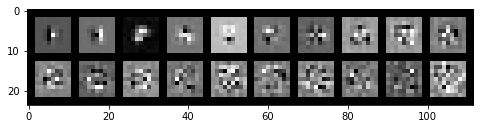

ff
[0.1823991  0.29267283 0.38238014 0.4492356  0.50104861 0.54560403
 0.58149191 0.61369825 0.64088102 0.66766806 0.69313593 0.71614105
 0.73691749 0.75487089 0.77172615 0.78739952 0.80195667 0.81479604
 0.82716965 0.83826629]


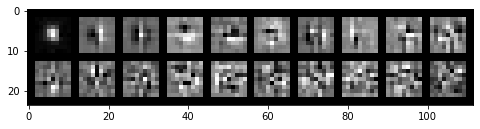

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx102/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.22455534 0.35625708 0.46359507 0.54972577 0.60849085 0.65132345
 0.6871652  0.71427293 0.73894454 0.76222956 0.78314844 0.79944148
 0.81474285 0.82671119 0.83735509 0.84780611 0.85730155 0.86627245
 0.87443508 0.88214809]


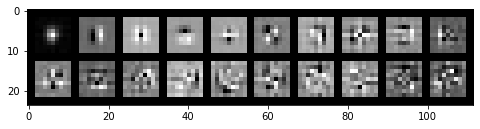

ff
[0.18875751 0.29667577 0.37419943 0.43467747 0.48314377 0.52170771
 0.55873373 0.59034823 0.61746926 0.6428311  0.66537984 0.68523869
 0.70464781 0.72200362 0.73623974 0.74988075 0.76261581 0.7745664
 0.7856592  0.7960161 ]


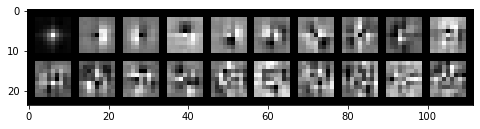

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx167/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.21788514 0.30707322 0.39274948 0.45003111 0.48648566 0.51467912
 0.54188261 0.56389693 0.58407552 0.6024711  0.61787749 0.6316721
 0.64507157 0.65723889 0.66911629 0.68012056 0.69033053 0.69996172
 0.70916043 0.71813865]


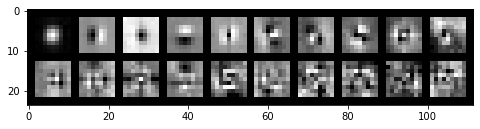

ff
[0.27463962 0.36036086 0.41869014 0.46022196 0.49458649 0.52630338
 0.55125658 0.5710452  0.58946821 0.60590173 0.62108423 0.63541201
 0.64885542 0.6612512  0.67236615 0.68279881 0.69268476 0.70187178
 0.71071996 0.71900953]


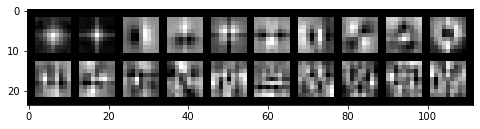

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx231/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.23842673 0.3814359  0.48199047 0.56264661 0.62648146 0.67735955
 0.72009984 0.75651632 0.79091602 0.81306195 0.83472535 0.85026703
 0.86494728 0.87747085 0.88952886 0.90041266 0.91042192 0.91894753
 0.92633747 0.93318611]


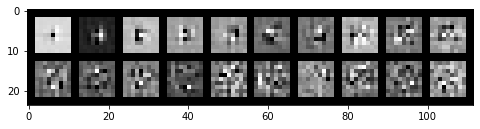

ff
[0.15976911 0.26026971 0.33280027 0.40024589 0.45633276 0.50428465
 0.54200027 0.5786311  0.61215182 0.64208709 0.66767567 0.69240198
 0.71477341 0.73451091 0.75386879 0.77160645 0.78740247 0.80210151
 0.81449179 0.82658789]


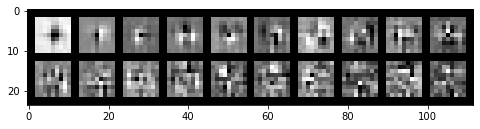

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx358/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.24307406 0.30328147 0.34279551 0.37278677 0.39764683 0.41803768
 0.43751303 0.45415124 0.46926864 0.48410206 0.49729123 0.50977453
 0.52156216 0.53292558 0.54395931 0.5547189  0.56541332 0.57584827
 0.5860453  0.595969  ]


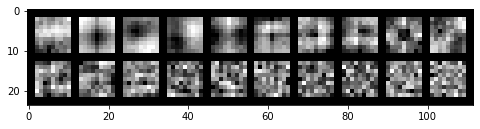

ff
[0.3908404  0.42862303 0.46025277 0.48728104 0.50536057 0.52086293
 0.53531069 0.54805315 0.56022823 0.5713652  0.58199082 0.59206974
 0.60145117 0.61057959 0.61914289 0.62752341 0.63573957 0.64391593
 0.65182056 0.65964001]


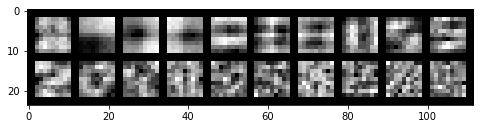

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx422/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.18273838 0.35682119 0.48629129 0.58099778 0.64786683 0.69187139
 0.73375272 0.77332759 0.80756233 0.83525706 0.86011267 0.87866664
 0.8927555  0.90563662 0.91650203 0.92595175 0.93468309 0.94267238
 0.94915295 0.95506896]


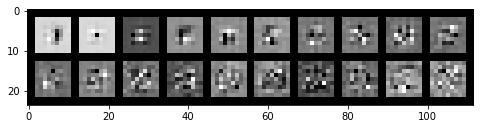

ff
[0.16520792 0.28395711 0.35769319 0.42165832 0.47928217 0.52591695
 0.5693862  0.60287302 0.63289628 0.66210217 0.68825647 0.70978653
 0.73059286 0.74947831 0.76694679 0.78302307 0.79792786 0.81160548
 0.82441601 0.83591766]


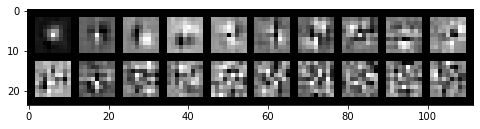

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx487/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.24305746 0.37059599 0.46585101 0.53496991 0.59363526 0.64301721
 0.68659746 0.71902643 0.74625355 0.77018604 0.78995678 0.80765279
 0.82142465 0.8338512  0.8442109  0.85386514 0.86269989 0.87079921
 0.87875119 0.88610014]


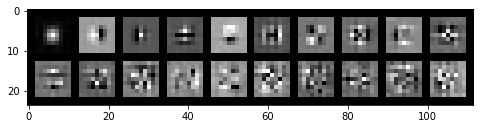

ff
[0.19596375 0.29744911 0.39044596 0.44614541 0.49985791 0.53469622
 0.56787554 0.59964551 0.6227716  0.64560562 0.66516749 0.68468469
 0.70213053 0.7183314  0.73392625 0.74783694 0.76080693 0.77287568
 0.78405547 0.79466046]


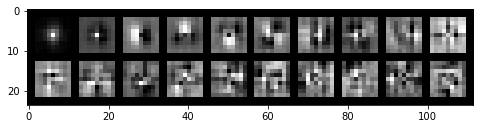

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx551/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.31966825 0.41786535 0.48887111 0.54823839 0.59484703 0.62645724
 0.65618048 0.68351292 0.7086074  0.72559533 0.74091718 0.75547473
 0.76778952 0.7789499  0.7897956  0.79928146 0.80857704 0.8171955
 0.82553867 0.83319344]


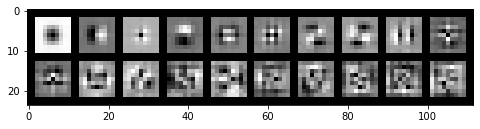

ff
[0.20608879 0.29282562 0.36904479 0.4247604  0.46188062 0.49190831
 0.52103324 0.54777523 0.57028979 0.59058297 0.6101458  0.6279237
 0.64469092 0.6602559  0.67456644 0.68745829 0.69953309 0.7112022
 0.72253338 0.73251313]


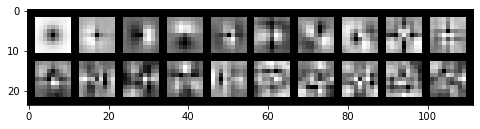

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx678/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.26326728 0.38215648 0.47663258 0.54552709 0.60877254 0.66239733
 0.69995194 0.7331756  0.76185856 0.78378705 0.8041146  0.82015492
 0.83206052 0.84358263 0.85441201 0.86462426 0.87403671 0.88215902
 0.88944977 0.8958796 ]


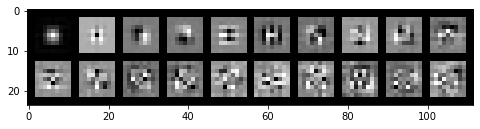

ff
[0.2119807  0.30999292 0.37877602 0.44454799 0.49246994 0.53402861
 0.56884526 0.59859762 0.62670589 0.65056505 0.67283565 0.69243036
 0.70946239 0.72597881 0.74123675 0.75488015 0.76742841 0.77916314
 0.79006359 0.80047141]


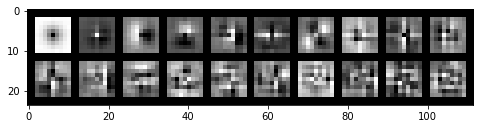

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx742/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.245006   0.35580185 0.43078122 0.50076962 0.5550127  0.59940467
 0.63698777 0.67266261 0.70495911 0.72544162 0.74402171 0.75900743
 0.7734352  0.7858672  0.79685141 0.80759556 0.81673918 0.82558193
 0.83403595 0.84165641]


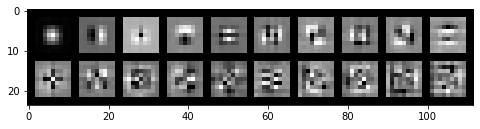

ff
[0.18589253 0.26832148 0.34953239 0.40649825 0.44706614 0.48371383
 0.51498027 0.54272972 0.56794651 0.58935015 0.60913537 0.6282247
 0.64568538 0.6621206  0.67762539 0.6916512  0.70481501 0.71755295
 0.72847903 0.73908242]


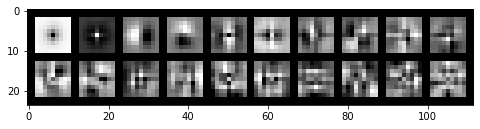

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx807/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.19084114 0.34345019 0.46654419 0.56995413 0.63665777 0.69177086
 0.73621972 0.76779419 0.79477925 0.81623771 0.83525992 0.85258915
 0.86705738 0.87952973 0.89186292 0.90336568 0.91375955 0.92311005
 0.93188902 0.93995285]


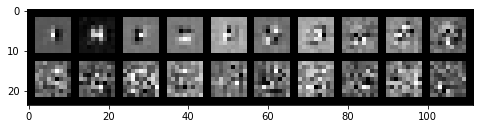

ff
[0.21377982 0.30232248 0.37755274 0.44170499 0.49676503 0.53746031
 0.57629761 0.6090785  0.63740934 0.66277138 0.6855362  0.7062751
 0.72604293 0.74389445 0.76028474 0.77606739 0.790977   0.80399441
 0.81577364 0.82738128]


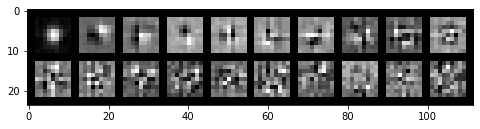

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx871/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.25330645 0.40689019 0.52024853 0.59999602 0.65123684 0.69026472
 0.72362149 0.75556506 0.77574653 0.79453723 0.81133968 0.82568137
 0.83828084 0.84968598 0.86012538 0.86993758 0.87871473 0.88618077
 0.89346669 0.89971328]


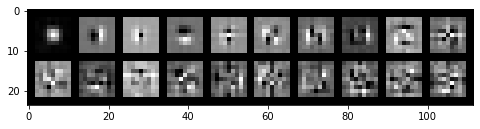

ff
[0.2077749  0.30843115 0.39274417 0.44950377 0.49538287 0.53444157
 0.56844417 0.59960704 0.62823657 0.65100055 0.67209545 0.69212141
 0.7106547  0.72846335 0.74295775 0.75605024 0.76853546 0.7804761
 0.791566   0.80181278]


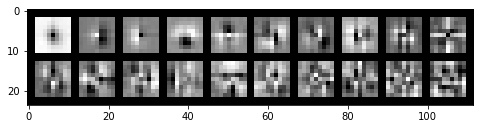

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx998/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.18076318 0.32366588 0.44136931 0.5191062  0.58391585 0.63841189
 0.6738978  0.70275618 0.73015247 0.75458352 0.77731143 0.79779016
 0.81735619 0.83601661 0.85173686 0.86732696 0.881261   0.89377788
 0.90473087 0.91460664]


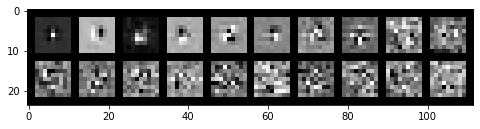

ff
[0.14810448 0.25110078 0.32187674 0.38677257 0.44505076 0.49430758
 0.53608059 0.56775226 0.59779789 0.62526355 0.65090197 0.67500629
 0.69622446 0.7153759  0.73366491 0.7502144  0.76614189 0.7812521
 0.79533573 0.80832363]


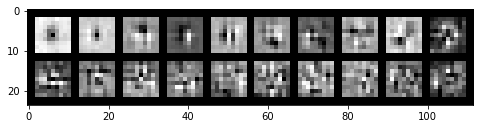

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx1062/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.25210112 0.39359639 0.50081663 0.56998653 0.61632021 0.64979528
 0.67944043 0.70661476 0.73076574 0.75077181 0.76941129 0.78569819
 0.79972803 0.81124714 0.82149178 0.83113932 0.84003361 0.84875698
 0.85696148 0.86460509]


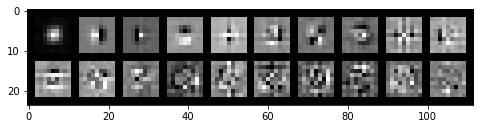

ff
[0.25872447 0.37277782 0.45931689 0.50996708 0.55750309 0.59595336
 0.63295788 0.66103018 0.68535673 0.70429302 0.72302866 0.74035861
 0.7554565  0.76892764 0.7808879  0.79187887 0.80236506 0.81261038
 0.82175606 0.83037323]


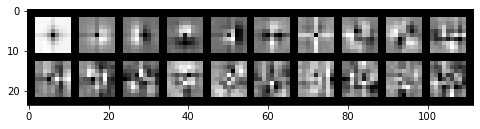

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx1127/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.24159499 0.3116121  0.35612115 0.39240231 0.41788166 0.43931509
 0.45877933 0.47715248 0.49300896 0.5076782  0.52086124 0.53314255
 0.54483302 0.5561688  0.56673701 0.57723508 0.58748413 0.59769277
 0.6077406  0.61748446]


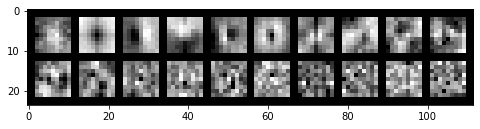

ff
[0.43015189 0.47474863 0.5124778  0.54250637 0.5600007  0.57386311
 0.58674448 0.59920454 0.61110675 0.62206587 0.63172956 0.64108443
 0.64982113 0.65815952 0.66615624 0.67369329 0.68096542 0.68814048
 0.69526972 0.7020535 ]


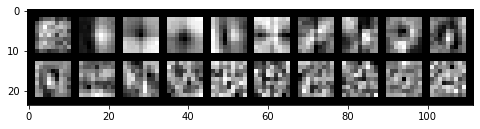

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx1191/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.17178836 0.3122263  0.43401193 0.53105842 0.61894483 0.67917262
 0.72603955 0.76279689 0.7927845  0.82000923 0.84470841 0.86096438
 0.87678192 0.8915258  0.90454122 0.91601731 0.92626666 0.93457406
 0.94183201 0.94839429]


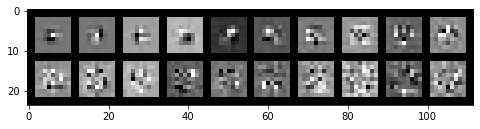

ff
[0.13717099 0.23234608 0.30016053 0.36401039 0.42108999 0.46874638
 0.51003437 0.5460671  0.58000452 0.60909087 0.63758627 0.66455757
 0.68619474 0.7070301  0.72753609 0.74491454 0.76199869 0.77715675
 0.7911339  0.80392277]


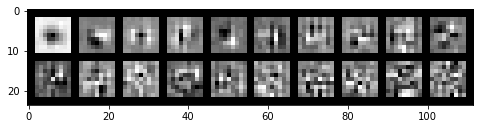

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx1318/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.28069333 0.38512096 0.4715382  0.54046934 0.59011671 0.6306785
 0.6637737  0.69113555 0.71381571 0.73312006 0.75042425 0.76592299
 0.77890513 0.7909293  0.80149312 0.81087038 0.81989226 0.82826536
 0.83586479 0.84298684]


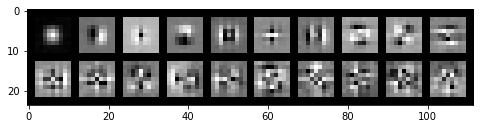

ff
[0.19795691 0.2779048  0.35252699 0.40243967 0.44449261 0.47948848
 0.51285096 0.54254118 0.56888224 0.59207047 0.61198691 0.63023396
 0.64805075 0.66504232 0.68083264 0.69516072 0.70857974 0.72172151
 0.7327707  0.74312878]


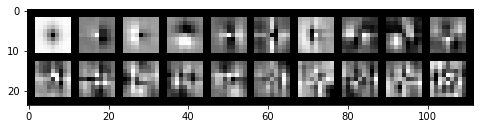

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx1382/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.20219985 0.36363484 0.46973423 0.55254624 0.62260318 0.68088712
 0.72576987 0.76190533 0.79270315 0.8189698  0.84466257 0.86255411
 0.87736946 0.89005997 0.90204584 0.91250432 0.92201869 0.93049781
 0.93891785 0.94613081]


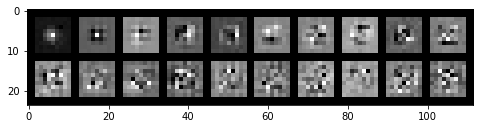

ff
[0.17827364 0.29081256 0.3813717  0.44948763 0.51019619 0.56528963
 0.61474152 0.64694266 0.67723509 0.7040825  0.72714186 0.74782194
 0.76757297 0.78381099 0.79978753 0.81495982 0.82804221 0.84018792
 0.85098846 0.86116826]


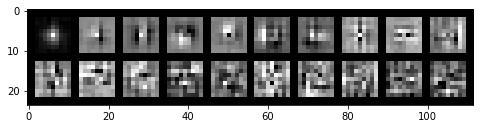

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx1447/actrelu/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.28944059 0.39026279 0.48838447 0.55134087 0.60218227 0.64772848
 0.68490019 0.71729409 0.74683332 0.76878436 0.78784919 0.80191548
 0.8153485  0.82654236 0.8375144  0.84804359 0.85754469 0.86619536
 0.87422092 0.88153636]


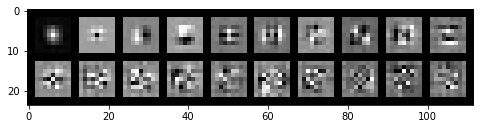

ff
[0.21660619 0.30882201 0.38679794 0.44430184 0.49615792 0.53691041
 0.57047826 0.60015067 0.62701996 0.65135256 0.67276172 0.69147515
 0.70884694 0.72551106 0.7400118  0.75343547 0.76609475 0.77798204
 0.78872327 0.79902884]


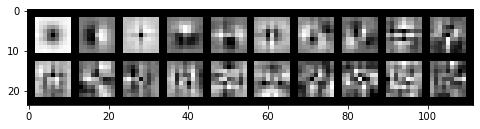

yuanyuan_8k_a_3day/feature_approximation_kbl_recurrent_k3_sep2+1/baseidx1511/actsoftplus/lossl1/k9/bn_preTrue/model_seed0
lateral
[0.27491594 0.38117997 0.45525177 0.52537858 0.57947277 0.61460427
 0.64314926 0.66958936 0.69208449 0.71185296 0.73027874 0.74453606
 0.75803707 0.76930546 0.77979259 0.78922929 0.79831456 0.8067678
 0.81482545 0.8223106 ]


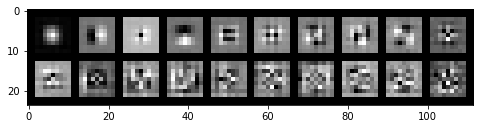

ff
[0.20030082 0.29144157 0.3659778  0.4201648  0.46337463 0.49727212
 0.52983691 0.5585874  0.58479868 0.60557016 0.62587386 0.6443744
 0.66118713 0.67670137 0.69068652 0.70402251 0.71571033 0.72676989
 0.73680941 0.74641512]


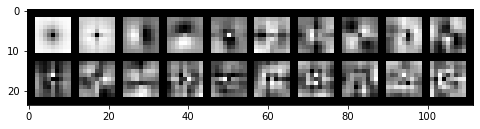

192


In [12]:
collect_all()